                 Avg_Age  Win_Percentage
Avg_Age         1.000000       -0.512182
Win_Percentage -0.512182        1.000000


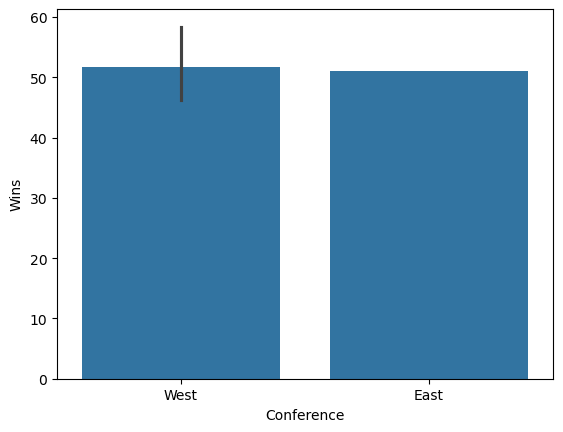

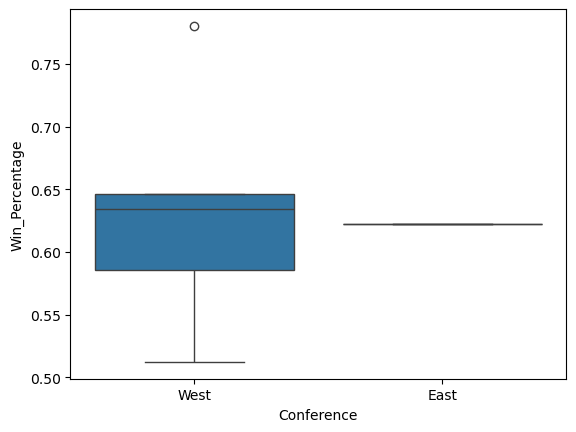

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot

data = {
    'Team': ['Lakers', 'Warriors', 'Suns', 'Celtics', 'Bucks', '76ers', 'Nuggets', 'Mavericks'],
    'Conference': ['West', 'West', 'West', 'East', 'East', 'East', 'West', 'West'],
    'Wins': [42, 53, 64, 51, 51, 51, 48, 52], # 승리
    'Losses': [40, 29, 18, 31, 31, 31, 34, 30], # 패배
    'Playoff_Run': ['Missed', 'Finals', 'First Round', 'Finals', 'Second Round', 'Second Round', 'First Round', 'First Round'], # 플레이오프 성적
    'Avg_Age': [30.1, 28.5, 27.2, 26.8, 27.5, 27.1, np.nan, 26.5] # 평균 연령
}
df_teams = pd.DataFrame(data)

# 1. 데이터 탐색 및 정제
# print(df_teams.info())

east_avg_age = df_teams[df_teams['Conference'] == 'East']['Avg_Age'].mean()
df_teams['Avg_Age'] = df_teams['Avg_Age'].fillna(east_avg_age)
# print(df_teams)

# 2. 데이터분석 (새로운 열 생성 및 필터링)
df_teams['Win_Percentage'] = df_teams['Wins'] / (df_teams['Wins'] + df_teams['Losses'])
only_finals = df_teams[df_teams['Playoff_Run'] == 'Finals']

# print(df_teams)
# print(only_finals)

# 3. 통계 및 시각화
matrix = df_teams[['Avg_Age', 'Win_Percentage']]
print(matrix.corr())  # 출력 결과: 평균 나이가 높을 수록 승률이 떨어지는 경향이 있음. 음의 상관계수

sns.barplot(x='Conference', y='Wins', data=df_teams)
plt.show()

sns.boxplot(x='Conference', y='Win_Percentage', data=df_teams)
plt.show()